In [64]:
import scipy.stats as st
import numpy as np

familysize = (3, 4, 5, 6)
logfiles = ('phase24771780', 'phase24771781', 'phase24771782', 'phase24784924')


confs = [[] for _ in familysize]
chroms = range(1, 23)
runtimes = []
for i, (j, logfile) in enumerate(zip(familysize, logfiles)):
    rt = []
    for chrom in chroms:
        with open('../logs/%s_%d.out' % (logfile, chrom)) as f:
            forward, backward = [], []
            for line in f:
                if line.startswith('Forward sweep'):
                    pieces = line.strip().split()
                    forward.append(float(pieces[3]))
                elif line.startswith('Backward sweep'):
                    pieces = line.strip().split()
                    if len(pieces) > 3:
                        backward.append(float(pieces[3]))
            a = [(x+y)/60 for x, y in zip(forward, backward)]
            if len(a)>0:
                confs[i].append(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
            else:
                confs[i].append((np.nan, np.nan))
            rt.extend(a)
    runtimes.append(rt)

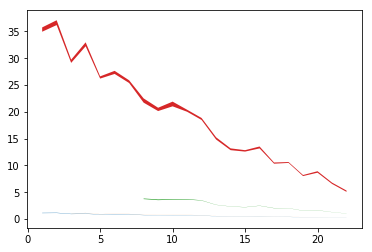

In [65]:
import matplotlib.pyplot as plt

for j, conf in zip(familysize, confs):
    plt.fill_between(chroms, [x[0] for x in conf], [x[1] for x in conf])
plt.show()

[ 0.52678809 -3.61600071  5.63597916]


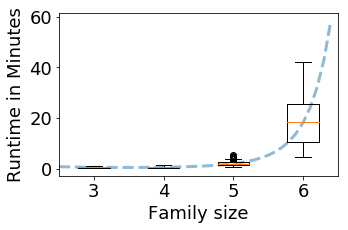

In [116]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(5, 3))
avg_rt = [np.mean(x) for x in runtimes]
z = np.polyfit(np.asarray(familysize), np.log(avg_rt), 2)
print(z)
p = np.poly1d(z)
plt.plot(np.arange(0.5, 4.5, 0.1), np.exp(p(np.arange(2.5, 6.5, 0.1))), linestyle='--', linewidth=3, alpha=0.5)

plt.boxplot(runtimes)

plt.xticks(range(1, 5), familysize)
plt.xlabel('Family size')
plt.ylabel('Runtime in Minutes')
plt.show()

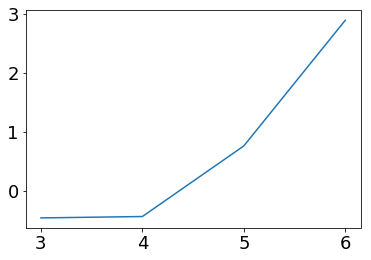

In [87]:
plt.plot(familysize, np.log(avg_rt))
plt.show()